# Fashion Mnist Test

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

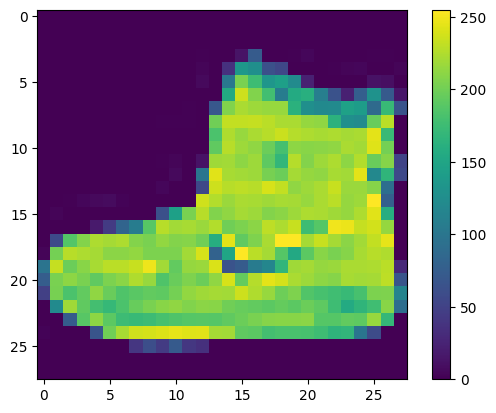

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

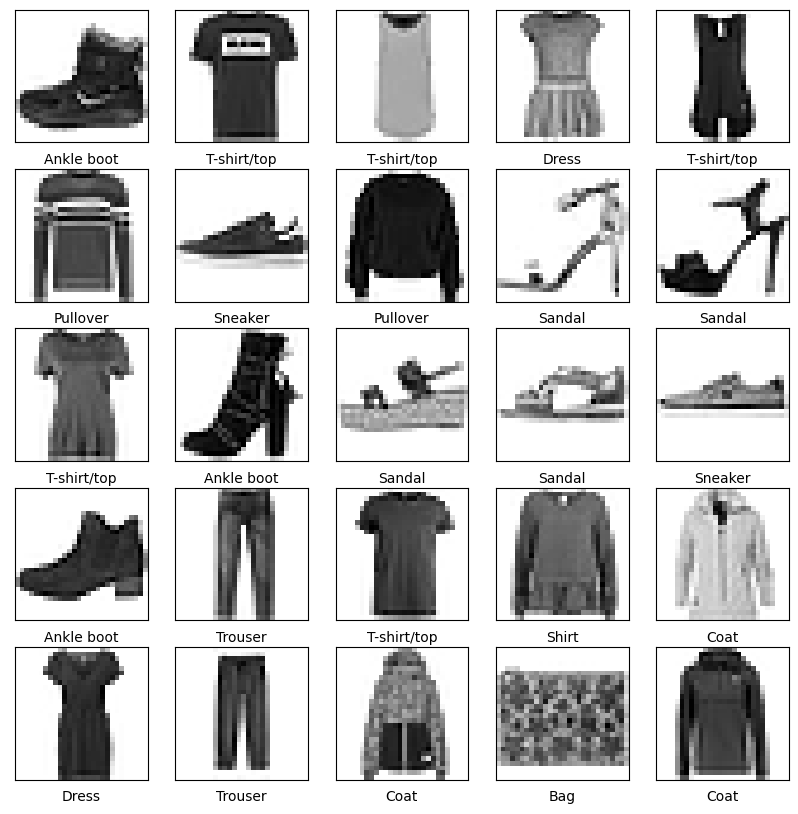

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 809us/step - loss: 0.4998 - accuracy: 0.8255
Epoch 2/20
1875/1875 [==============================] - 2s 810us/step - loss: 0.3748 - accuracy: 0.8652
Epoch 3/20
1875/1875 [==============================] - 1s 775us/step - loss: 0.3367 - accuracy: 0.8777
Epoch 4/20
1875/1875 [==============================] - 1s 720us/step - loss: 0.3115 - accuracy: 0.8869
Epoch 5/20
1875/1875 [==============================] - 1s 743us/step - loss: 0.2954 - accuracy: 0.8906
Epoch 6/20
1875/1875 [==============================] - 1s 708us/step - loss: 0.2808 - accuracy: 0.8963
Epoch 7/20
1875/1875 [==============================] - 1s 726us/step - loss: 0.2693 - accuracy: 0.9001
Epoch 8/20
1875/1875 [==============================] - 1s 726us/step - loss: 0.2581 - accuracy: 0.9036
Epoch 9/20
1875/1875 [==============================] - 1s 717us/step - loss: 0.2480 - accuracy: 0.9081
Epoch 10/20
1875/1875 [==============================] - 1s 720u

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3810 - accuracy: 0.8810 - 189ms/epoch - 604us/step

Test accuracy: 0.8809999823570251


# Make predictions

In [11]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

313/313 [==============================] - 0s 405us/step


9

In [12]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Using the model

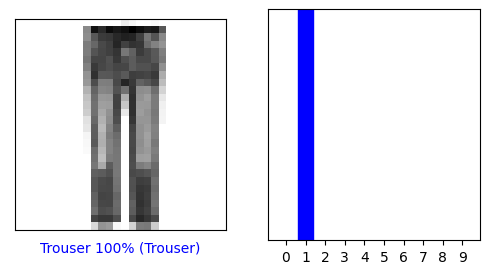

In [21]:
i = 15
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


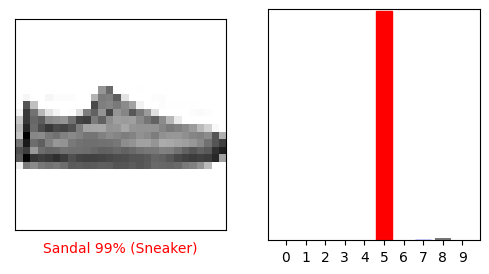

In [14]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

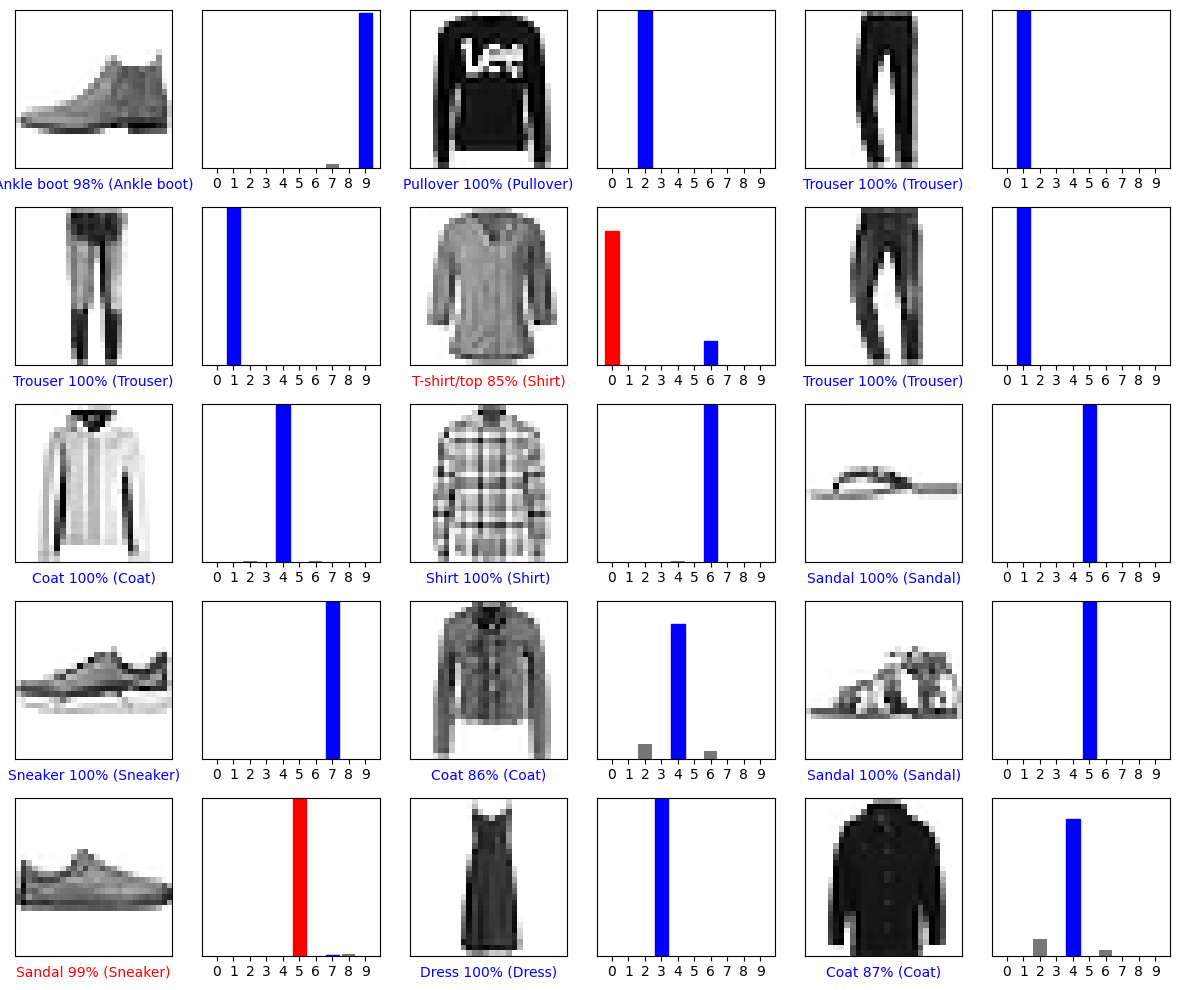

In [15]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range (num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Making a prediction about a single image

In [16]:
img = test_images[1]

print(img.shape)

(28, 28)


In [17]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


1/1 [==============================] - 0s 11ms/step
[[3.6861073e-07 2.6501253e-15 9.9986410e-01 3.5743091e-13 1.2269718e-04
  2.1113044e-12 1.2827169e-05 3.6277110e-31 6.8391261e-12 7.5532283e-13]]


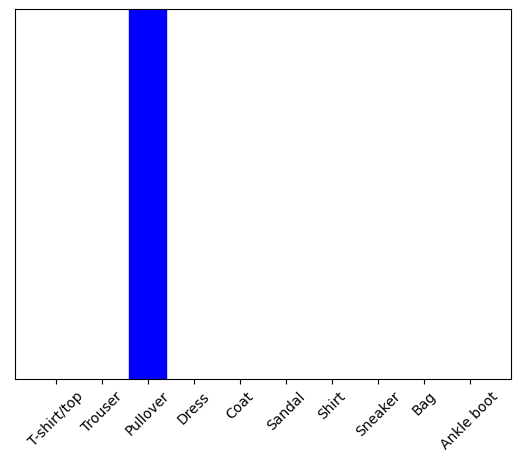

In [18]:
predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [19]:
np.argmax(predictions_single[0])

2